<a href="https://colab.research.google.com/github/shelarsameer/imageprocessingtechniques/blob/main/imageprocessingtechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import cv2
from PIL import Image
from skimage.io import imread, imsave
import numpy as np
import matplotlib.pyplot as plt

Reading image
Converting to grayscale image

In [ ]:
img = cv2.imread("/content/133796183409379022.jpg")  # BGR image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Printing shape (Resolution) of images

In [ ]:
print("Color image shape:", img.shape)
print("Grayscale image shape:", gray.shape)

Color image shape: (2160, 3840, 3)
Grayscale image shape: (2160, 3840)


Plotting images
(The BGR needs to be converted to RGB first)

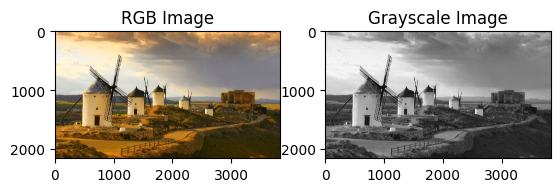

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("RGB Image")

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.show()

Converting the image to RGB, HSV, LAB, YCRCB

In [ ]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

PLotting the images

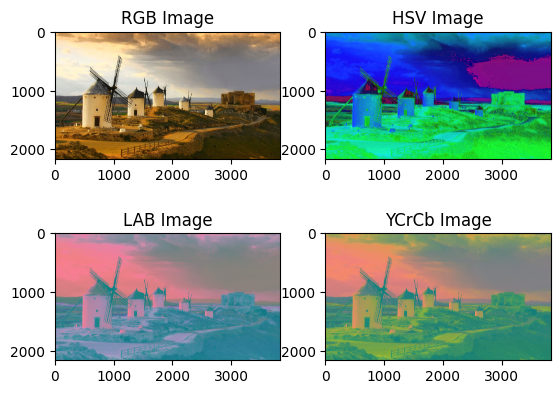

In [ ]:
plt.subplot(2, 2, 1)
plt.imshow(rgb)
plt.title("RGB Image")

plt.subplot(2, 2, 2)
plt.imshow(hsv)
plt.title("HSV Image")

plt.subplot(2, 2, 3)
plt.imshow(lab)
plt.title("LAB Image")

plt.subplot(2, 2, 4)
plt.imshow(ycrcb)
plt.title("YCrCb Image")
plt.show()

Image Reading

In [48]:
# OpenCV: BGR format
img_cv2 = cv2.imread("/content/133796183409379022.jpg")

# PIL: RGB format
img_pil = Image.open("/content/133796183409379022.jpg")
img_pil_np = np.array(img_pil)

# skimage: RGB, float (0.0 - 1.0)
img_sk = imread("/content/133796183409379022.jpg")


Image Writing

In [ ]:
cv2.imwrite('output_cv2.jpg', img_cv2)  # BGR
img_pil.save('output_pil.jpg')         # RGB
imsave('output_skimage.jpg', (img_sk * 255).astype('uint8'))  # RGB float → uint8

Display Comparison

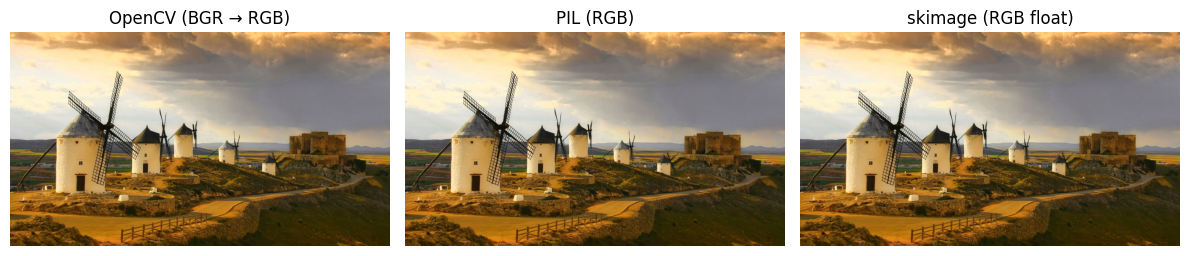

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
plt.title('OpenCV (BGR → RGB)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_pil_np)
plt.title('PIL (RGB)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_sk)
plt.title('skimage (RGB float)')
plt.axis('off')

plt.tight_layout()
plt.show()

Histogram Equalization

/tmp/ipython-input-15-4040495670.py:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0, 256])
/tmp/ipython-input-15-4040495670.py:22: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 256, [0, 256])


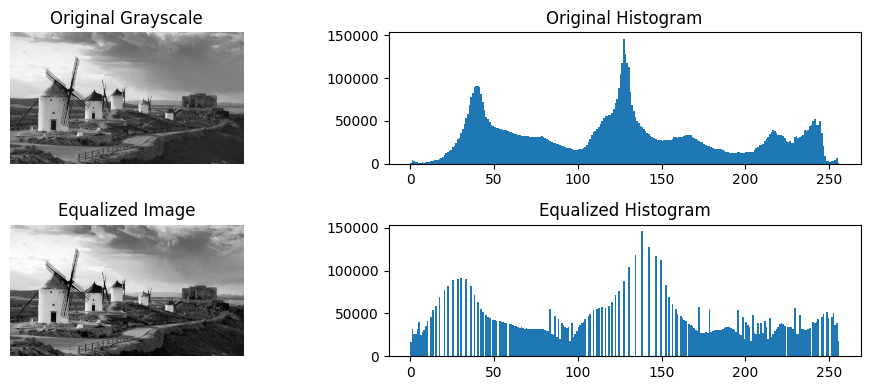

In [ ]:
# Apply histogram equalization
equalized = cv2.equalizeHist(gray)

# Plotting
plt.figure(figsize=(10, 4))

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(gray.ravel(), 256, [0, 256])
plt.title('Original Histogram')

plt.subplot(2, 2, 3)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(equalized.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()


Contrast/Brightness

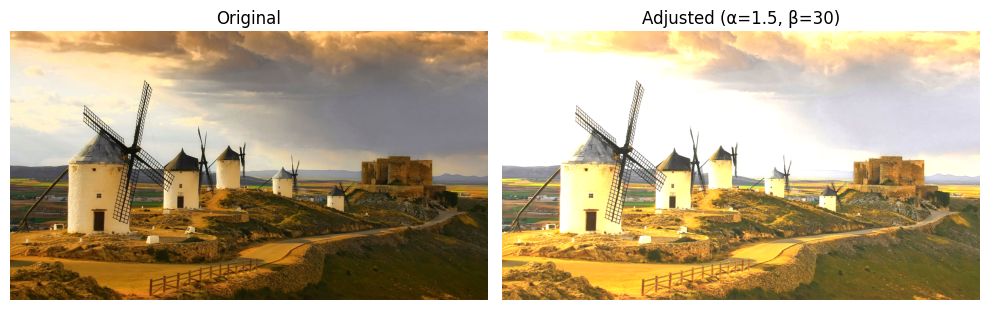

In [ ]:
# Contrast and Brightness Adjustment
alpha = 1.5
beta = 30

adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Display
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.title(f'Adjusted (α={alpha}, β={beta})')
plt.axis('off')

plt.tight_layout()
plt.show()

Smoothing/Blurring

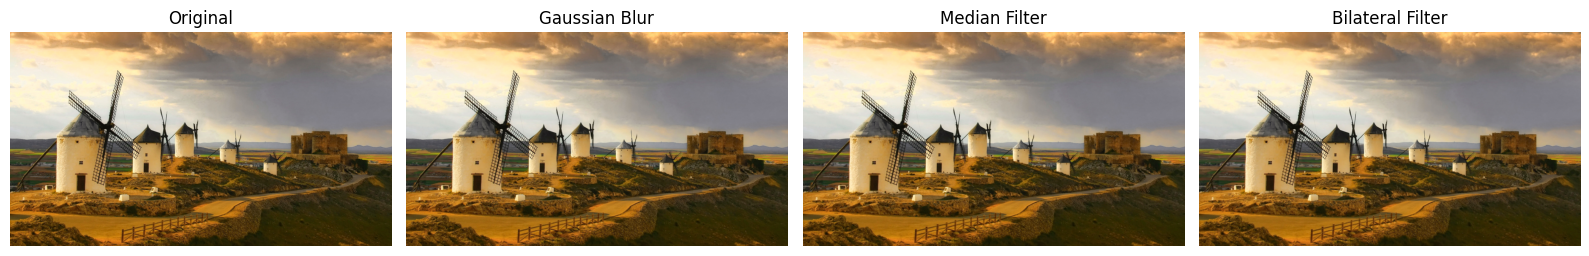

In [ ]:
gaussian = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

titles = ['Original', 'Gaussian Blur', 'Median Filter', 'Bilateral Filter']
images = [img, gaussian, median, bilateral]

plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


Sharpening: Laplacian. Unsharp Masking


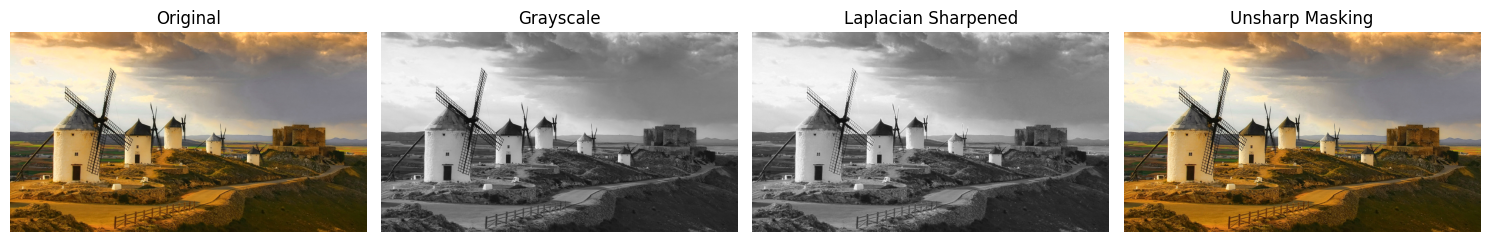

In [ ]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
sharpened_lap = cv2.add(gray, laplacian)

blurred = cv2.GaussianBlur(img, (9, 9), 10.0)
unsharp = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)

plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sharpened_lap, cmap='gray')
plt.title('Laplacian Sharpened')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(unsharp, cv2.COLOR_BGR2RGB))
plt.title('Unsharp Masking')
plt.axis('off')

plt.tight_layout()
plt.show()


Geometric Transformations


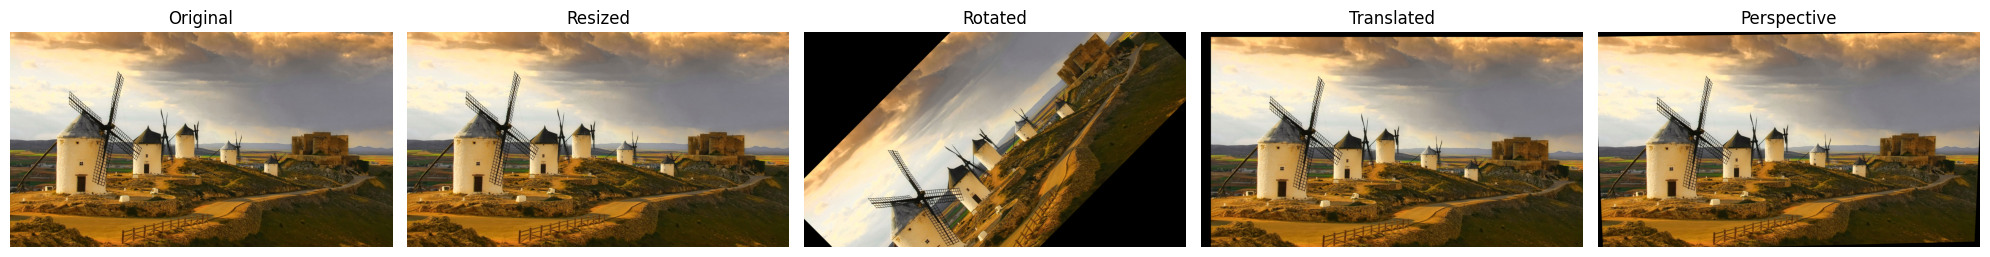

In [27]:
(h, w) = img.shape[:2]

# Resize (scale)
resized = cv2.resize(img, (w // 2, h // 2))

# Rotate
rot_matrix = cv2.getRotationMatrix2D((w//2, h//2), 45, 1.0)
rotated = cv2.warpAffine(img, rot_matrix, (w, h))

# Translate
trans_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
translated = cv2.warpAffine(img, trans_matrix, (w, h))

# Perspective
pts1 = np.float32([[50, 50], [w-50, 50], [50, h-50], [w-50, h-50]])
pts2 = np.float32([[10, 100], [w-10, 50], [100, h-10], [w-100, h-100]])
pers_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspective = cv2.warpPerspective(img, pers_matrix, (w, h))

# Display
titles = ['Original', 'Resized', 'Rotated', 'Translated', 'Perspective']
images = [img, resized, rotated, translated, perspective]

plt.figure(figsize=(20, 5))
for i in range(len(images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Cropping

(1000, 1100, 3)


(np.float64(-0.5), np.float64(1099.5), np.float64(999.5), np.float64(-0.5))

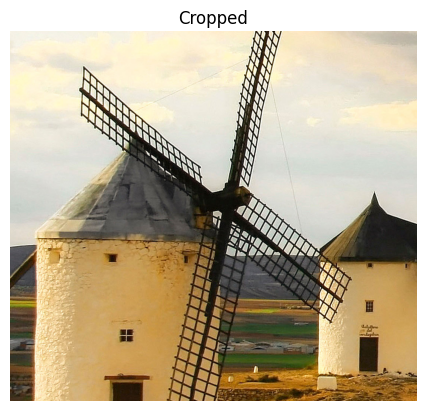

In [44]:
cropped = img[500:1500, 400:1500]
print(cropped.shape)
plt.subplot()
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title("Cropped")
plt.axis('off')

Resizing

(150, 150, 3)


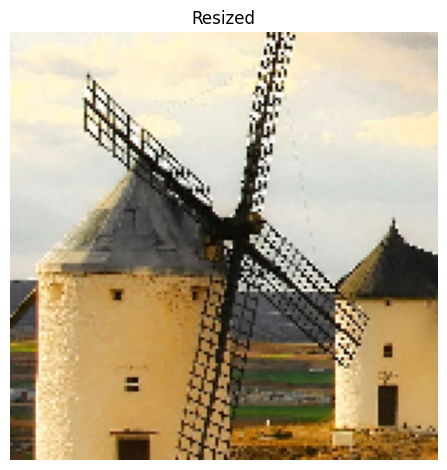

In [42]:
resized = cv2.resize(cropped, (150, 150))
print(resized.shape)
plt.subplot()
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Resized")
plt.axis('off')
plt.tight_layout()
plt.show()

Image Registration

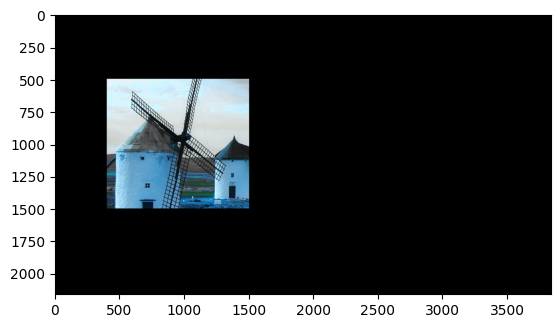

In [60]:
img1 = rgb  # Reference image
img2 = cropped # Image to align

# Detect ORB keypoints and descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Match features using BruteForce-Hamming
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.match(des1, des2)

# Sort by best matches
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:20]

# Extract location of good matches
src_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Estimate transformation matrix
matrix, _ = cv2.estimateAffinePartial2D(src_pts, dst_pts)

# Warp img2 to align with img1
aligned = cv2.warpAffine(img2, matrix, (img1.shape[1], img1.shape[0]))


plt.imshow(aligned)

Thresholding and Edge Detection

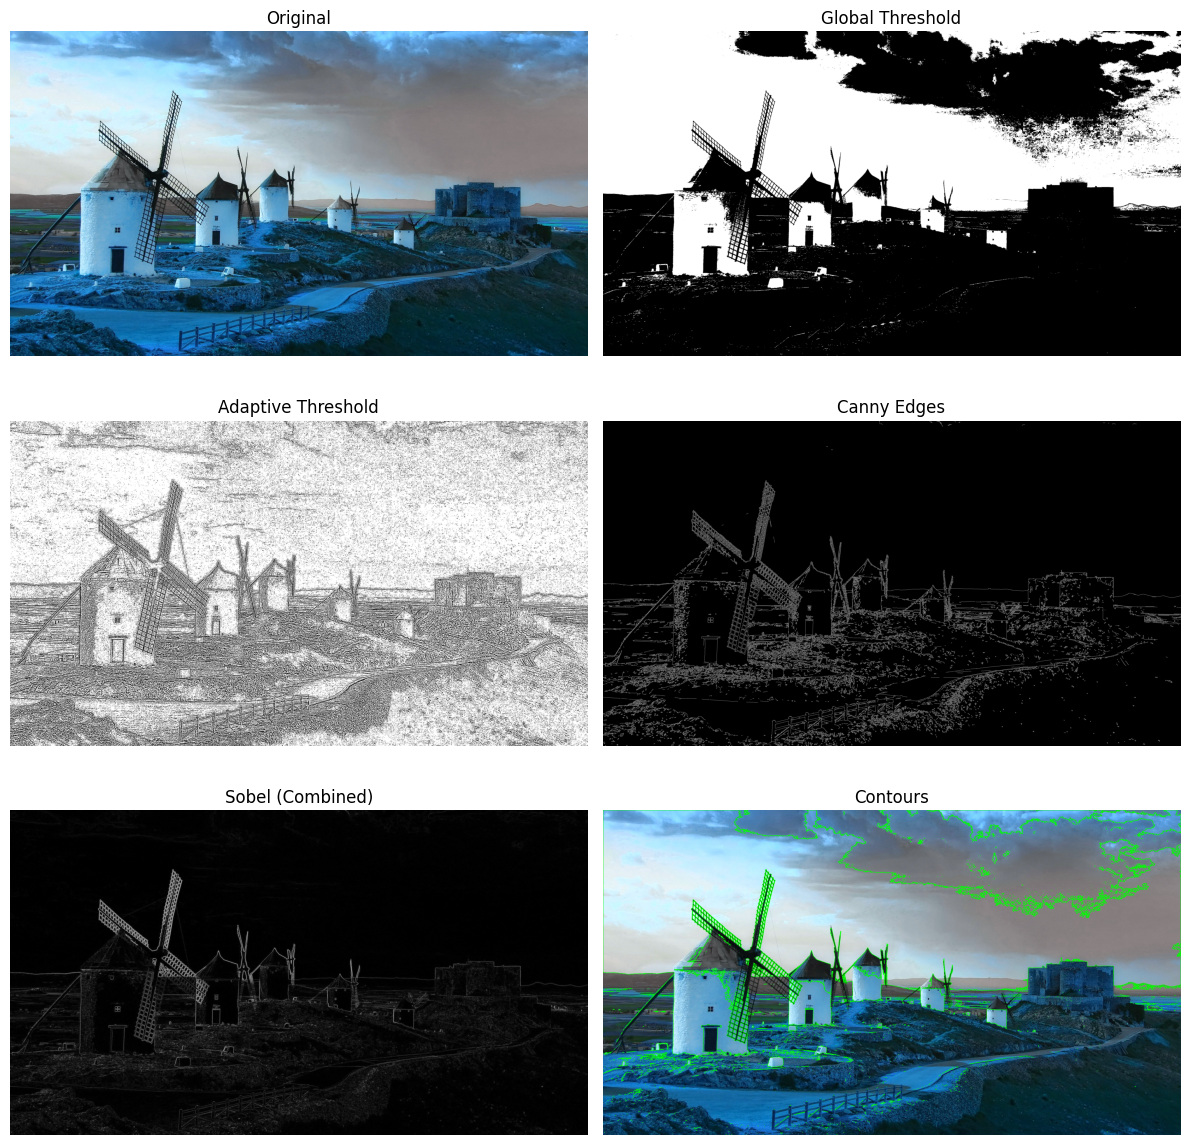

In [68]:
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

# Global thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Adaptive thresholding
adaptive = cv2.adaptiveThreshold(gray, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

# Canny Edge Detection
edges = cv2.Canny(gray, 100, 200)

# Sobel Edge Detection
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Horizontal edges
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Vertical edges
sobel_combined = cv2.magnitude(sobelx, sobely)  # Combine both

# Contour Detection
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = rgb.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)


titles = [
    'Original', 'Global Threshold',
    'Adaptive Threshold', 'Canny Edges',
    'Sobel (Combined)', 'Contours'
]
images = [
    cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB), thresh,
    adaptive, edges,
    sobel_combined, cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)
]


plt.figure(figsize=(12, 12))
for i in range(len(images)):
    plt.subplot(3, 2, i + 1)
    cmap = 'gray' if len(images[i].shape) == 2 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


IMage Segmentation

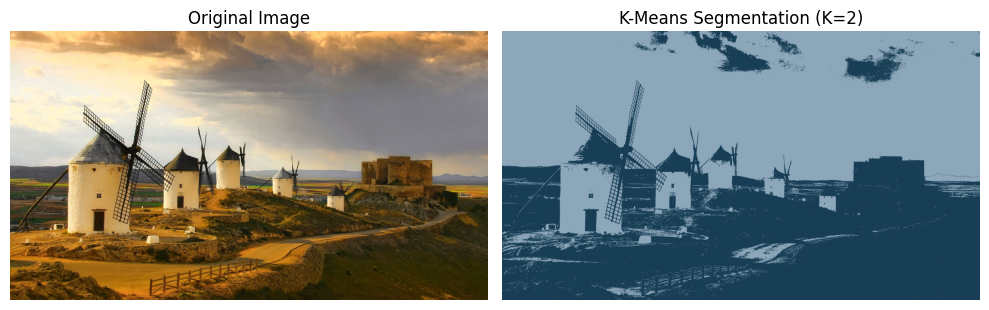

In [83]:
img_rgb = rgb

#Reshape to a list of pixels
Z = rgb.reshape((-1, 3))
Z = np.float32(Z)

# Define criteria and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers back to uint8 and reconstruct segmented image
centers = np.uint8(centers)
segmented = centers[labels.flatten()].reshape(rgb.shape)
segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)

# Plot original and segmented image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_rgb)
plt.title(f'K-Means Segmentation (K={K})')
plt.axis('off')

plt.tight_layout()
plt.show()


Morphological operations

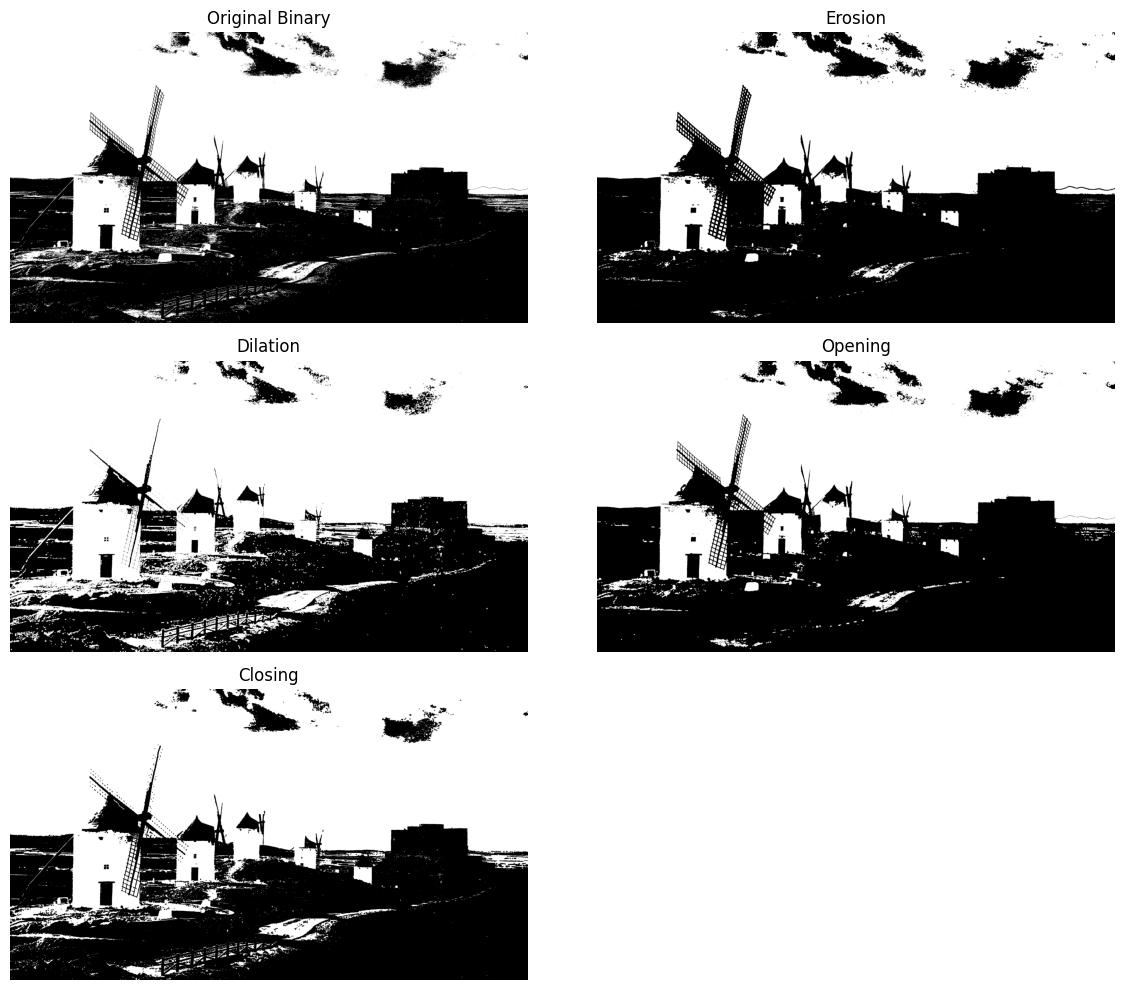

In [89]:
_, binary = cv2.threshold(segmented_rgb, 127, 255, cv2.THRESH_BINARY)

# Define a kernel
kernel = np.ones((5, 5), np.uint8)

# Erosion: Removes white noise
erosion = cv2.erode(binary, kernel, iterations=1)

# Dilation: Fills gaps in white regions
dilation = cv2.dilate(binary, kernel, iterations=1)

# Opening: erosion followed by dilation (remove noise)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Closing: dilation followed by erosion (fill holes)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Visualize: 2 plots per row
titles = ['Original Binary', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [binary, erosion, dilation, opening, closing]

plt.figure(figsize=(12, 10))
for i in range(len(images)):
    plt.subplot(3, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Transformation

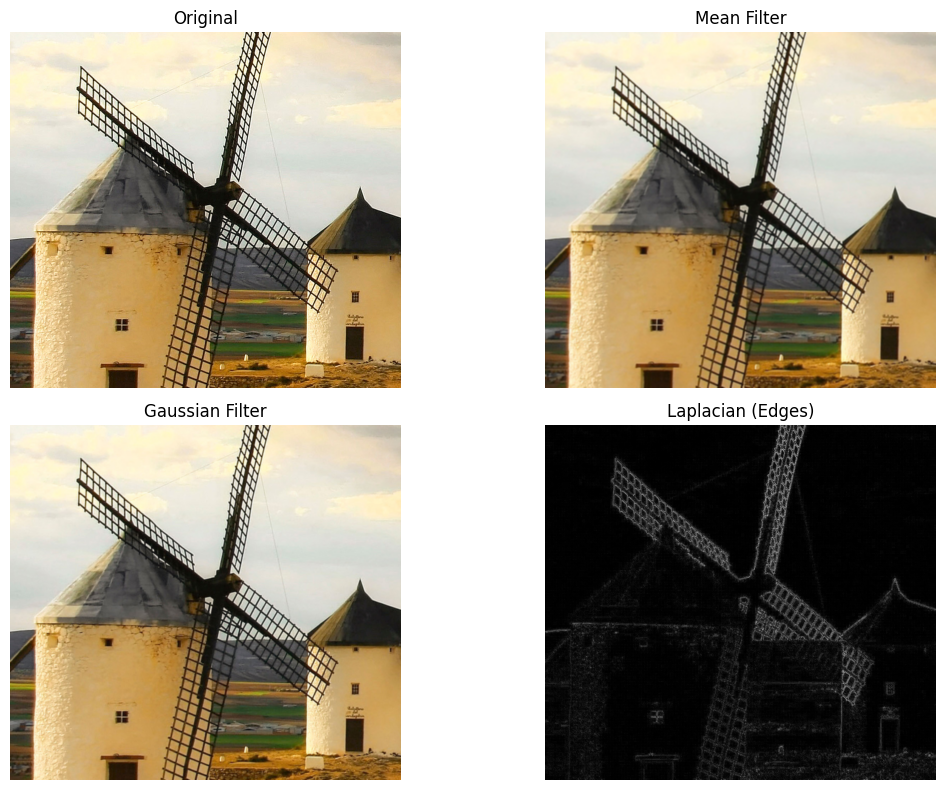

In [100]:
img_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

# Apply filters
mean_blur = cv2.blur(cropped, (5, 5))
gaussian_blur = cv2.GaussianBlur(cropped, (5, 5), 0)

# Convert to grayscale for Laplacian
croppedgray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(croppedgray, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Prepare images for display
titles = ['Original', 'Mean Filter', 'Gaussian Filter', 'Laplacian (Edges)']
images = [img_rgb,
          cv2.cvtColor(mean_blur, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB),
          laplacian]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    cmap = 'gray' if i == 3 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()